In [1]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr
import matplotlib.pyplot as plt
from xlayers import finegrid, layers
from xlayers.core import layers_apply
import numpy as np

In [2]:
#load mitgcm output where \kappa_{redi}=50 (modern)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/diffusion_50'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2','layersDiags','dyn','gm']
ds50=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid = xgcm.Grid(ds50, periodic=['X'])

In [3]:
#load mitgcm output where \kappa_{redi}=500 (modern)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/diffusion_500'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)

In [4]:
#load mitgcm output where \kappa_{redi}=5000 (modern)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/diffusion_5000'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)

In [5]:
#load mitgcm output where \kappa_{redi}=50 (SUC)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/LGM50'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','layersDiags','dyn','tracer2','gm']
dsLGM50=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dsLGM50, periodic=['X'])

In [6]:
#load mitgcm output where \kappa_{redi}=500 (SUC)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/LGM500'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','tracer2']#
dsLGM500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dsLGM500, periodic=['X'])

In [7]:
#load mitgcm output where \kappa_{redi}=5000 (SUC)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/LGM5000'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','tracer2']#
dsLGM5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dsLGM5000, periodic=['X'])

In [56]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})
print(grid)

<xgcm.Grid>
1RHO Axis (not periodic, boundary=None):
  * center   layer_1RHO_center --> outer
  * outer    layer_1RHO_bounds --> center
  * inner    layer_1RHO_interface --> center
X Axis (periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * outer    Zp1 --> center
  * right    Zu --> center
  * left     Zl --> center
T Axis (not periodic, boundary=None):
  * center   time
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center


In [9]:
data[:-1]

<xarray.DataArray (x: 1, y: 3)>
array([[0.59673949, 0.91487066, 1.82307527]])
Coordinates:
  * x        (x) int64 10
Dimensions without coordinates: y

In [10]:
#Find the mean depth of isopycnals in each basin (modern)
layers_depth_pac1 = (grid.cumsum((ds50.LaHs1RHO*ds50.dxG).mean('time').where(ds50.XC<140).sum('XC')/ds50.dxG.where(ds50.XC<140).sum('XC'), '1RHO',         
                                    boundary='fill').load())
layers_depth_atl1=(grid.cumsum((ds50.LaHs1RHO*ds50.dxG).mean('time').where(ds50.XC>140).sum('XC')/ds50.dxG.where(ds50.XC>140).sum('XC'), '1RHO', 
                                  boundary='fill').load())
layers_depth1=grid.cumsum(ds50.LaHs1RHO.mean('time').mean('XC'), '1RHO', boundary='fill').load()
layers_depth_atlmix1=xr.concat([layers_depth1[:,0:36], layers_depth_atl1[:,36:144]],'YG')
layers_depth_pacmix1=xr.concat([layers_depth1[:,0:36], layers_depth_pac1[:,36:144]],'YG')
layers_depth_pacmix1=layers_depth_pacmix1.where(xr.ufuncs.isfinite(layers_depth_pacmix1),0)
layers_depth_atlmix1=layers_depth_atlmix1.where(xr.ufuncs.isfinite(layers_depth_atlmix1),0)

In [11]:
#Find the mean depth of isopycnals in each basin (SUC)
layers_depth_pac2 = (grid2.cumsum((dsLGM50.LaHs1RHO*dsLGM50.dxG).mean('time').where(dsLGM50.XC<140).sum('XC')/
                                  dsLGM50.dxG.where(dsLGM50.XC<140).sum('XC'), '1RHO', boundary='fill').load())
layers_depth_atl2=(grid2.cumsum((dsLGM50.LaHs1RHO*dsLGM50.dxG).mean('time').where(dsLGM50.XC>140).sum('XC')/
                                dsLGM50.dxG.where(dsLGM50.XC>140).sum('XC'), '1RHO', boundary='fill').load())
layers_depth2=grid2.cumsum(dsLGM50.LaHs1RHO.mean('time').mean('XC'), '1RHO', boundary='fill').load()
layers_depth_atlmix2=xr.concat([layers_depth2[:,0:36], layers_depth_atl2[:,36:144]],'YG')
layers_depth_pacmix2=xr.concat([layers_depth2[:,0:36], layers_depth_pac2[:,36:144]],'YG')
layers_depth_pacmix2=layers_depth_pacmix2.where(xr.ufuncs.isfinite(layers_depth_pacmix2),0)
layers_depth_atlmix2=layers_depth_atlmix2.where(xr.ufuncs.isfinite(layers_depth_atlmix2),0)

In [12]:
#Find the ROC
ROC_pac1=grid.cumsum((ds50.LaVH1RHO[:,:,:,0:139]*ds50.dxG[:,0:139]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_atl1=grid.cumsum((ds50.LaVH1RHO[:,:,:,140:215]*ds50.dxG[:,140:215]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_tot1=grid.cumsum((ds50.LaVH1RHO*ds50.dxG).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_pac2=grid2.cumsum((dsLGM50.LaVH1RHO[:,:,:,0:139]*dsLGM50.dxG[:,0:139]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_atl2=grid2.cumsum((dsLGM50.LaVH1RHO[:,:,:,140:215]*dsLGM50.dxG[:,140:215]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_tot2=grid2.cumsum((dsLGM50.LaVH1RHO*dsLGM50.dxG).mean('time').sum('XC'),'1RHO',boundary='fill').load()

In [13]:
#Eulerian overturning
#modern
OT_atl=grid.cumsum((ds50.VVEL*ds50.drF*ds50.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot=grid.cumsum((ds50.VVEL*ds50.drF*ds50.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac=grid.cumsum((ds50.VVEL*ds50.drF*ds50.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl=(ds50.GM_PsiY*ds50.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot=(ds50.GM_PsiY*ds50.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac=(ds50.GM_PsiY*ds50.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).rolling(YG=2).mean().load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).rolling(YG=2).mean().load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).rolling(YG=2).mean().load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()

#SUC
OT_atl_LGM=grid.cumsum((dsLGM50.VVEL*dsLGM50.drF*dsLGM50.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot_LGM=grid.cumsum((dsLGM50.VVEL*dsLGM50.drF*dsLGM50.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac_LGM=grid.cumsum((dsLGM50.VVEL*dsLGM50.drF*dsLGM50.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl_LGM=(dsLGM50.GM_PsiY*dsLGM50.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot_LGM=(dsLGM50.GM_PsiY*dsLGM50.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac_LGM=(dsLGM50.GM_PsiY*dsLGM50.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl_LGM=OT_atl_LGM.load()
Eul_atl_LGM[0:-1,:]=(OT_atl_LGM[0:-1,:]+gm_atl_LGM).rolling(YG=2).mean().load()
Eul_tot_LGM=OT_tot_LGM.load()
Eul_tot_LGM[0:-1,:]=(OT_tot_LGM[0:-1,:]+gm_tot_LGM).rolling(YG=2).mean().load()
Eul_pac_LGM=OT_pac_LGM.load()
Eul_pac_LGM[0:-1,:]=(OT_pac_LGM[0:-1,:]+gm_pac_LGM).rolling(YG=2).mean().load()
Eul_atl_LGM[:,0:35]=Eul_tot_LGM[:,0:35].load()
Eul_pac_LGM[:,0:35]=Eul_tot_LGM[:,0:35].load()

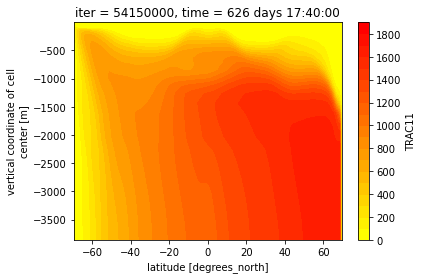

In [59]:
wVel=ds50.WVEL[0,:,:,:].mean('XC')
#wVel.plot.contourf(levels=np.arange(-0.5e-5,0.5e-5,0.01e-5))
age=ds500.TRAC11[0,:,:,:].mean('XC')/(31104000)
age_pac=ds500.TRAC11[0,:,:,0:139].mean('XC')/(31104000)
age_pac.plot.contourf(levels=np.arange(0,2000,100),cmap=plt.cm.autumn.reversed(),extend='neither')

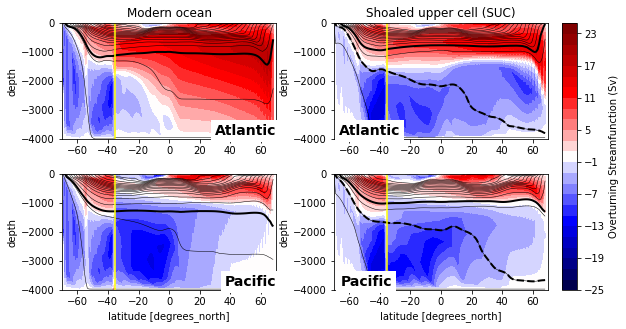

In [30]:
#Plot figure 2
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0085,0.4,0.2),colors='black',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Modern ocean')
ax=plt.gca()
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
b = ROC_pac1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix1
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_pac1)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.0085,0.4,0.2),colors='black',linewidths=2)
#layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0073,0.4,0.2),colors='black',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.014,0.4,0.2),colors='black',linewidths=2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.01,0.4,0.2),colors='black',
                            linestyles='dashed',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Shoaled upper cell (SUC)')
ax=plt.gca()
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
b = ROC_pac2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix2
im=(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_pac2)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.014,0.4,0.2),colors='black',linewidths=2)

layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.01,0.4,0.2),colors='black',
                            linestyles='dashed',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='Overturning Streamfunction (Sv)')
fig.savefig('ROC_modern_LGM.pdf', bbox_inches='tight')

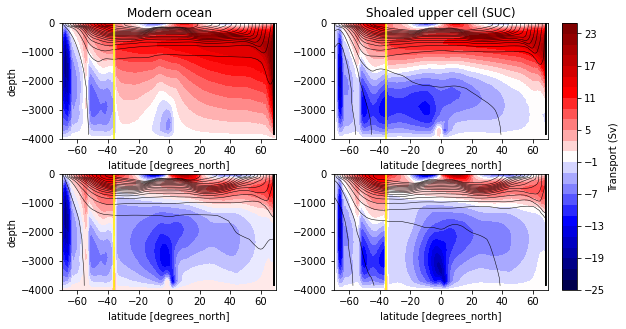

In [31]:
#Eulerian overturning (figure S1)
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))

(Eul_atl/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), 
                              cmap='seismic',add_colorbar=False)
b[0,:,:,141:-1].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)

ax = plt.gca()
ax.set_title('Modern ocean')
ax.axvline(-36,color='yellow')
ax.set_ylabel('depth')

plt.subplot(2, 2, 3)
(Eul_pac/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                             cmap='seismic',add_colorbar=False)
b[0,:,:,:140].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_ylabel('depth')
ax.set_title('')

plt.subplot(2, 2, 2)
b=9.81*(2*10**-4*dsLGM50.THETA-7.4*10**-4*(dsLGM50.SALT-35))


(Eul_atl_LGM/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                             cmap='seismic',add_colorbar=False)
b[0,:,:,141:-1].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_title('Shoaled upper cell (SUC)')
ax.set_ylabel('')

plt.subplot(2, 2, 4)
im = (Eul_pac_LGM/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                                cmap='seismic',add_colorbar=False)
b[0,:,:,:140].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_ylabel('')
ax.set_title('')

fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='Transport (Sv)')
fig.savefig('overturning_depth.pdf', bbox_inches='tight')

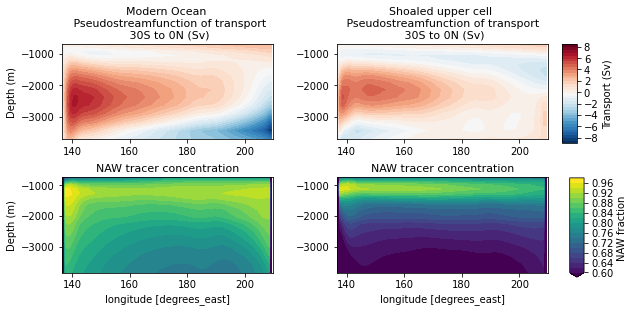

In [34]:
#Plot figure 6
fig, ax = plt.subplots(2,2,figsize=(10,6))
((ds50.WVEL[0,16:,41:72,137:]*ds50.rA[41:72,137:]).sum('YC').cumsum('XC')/10**6).plot.contourf(ax=ax[0,0],levels=np.arange(-9,9,0.5),add_colorbar=False)
ax[0,0].set_xlim(136.5,210)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Depth (m)')
ax[0,0].set_title('Modern Ocean \n Pseudostreamfunction of transport\n 30S to 0N (Sv)', fontsize=11)
ds500.TRAC01[0,16:,41:72,137:].mean('YC').plot.contourf(ax=ax[1,0],levels=np.arange(0.6,1,0.02),add_colorbar=False)
ax[1,0].set_title('NAW tracer concentration', fontsize=11)
ax[1,0].set_xlim(136.5,210)
ax[1,0].set_ylabel('Depth (m)')
im=((dsLGM50.WVEL[0,16:,41:72,137:]*ds500.rA[41:72,137:]).sum('YC').cumsum('XC')/10**6).plot.contourf(ax=ax[0,1],levels=np.arange(-9,9,0.5),add_colorbar=False)

ax[0,1].set_xlim(136.5,210)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].set_title('Shoaled upper cell \n Pseudostreamfunction of transport \n 30S to 0N (Sv)', fontsize=11)
im2=dsLGM500.TRAC01[0,16:,41:72,137:].mean('YC').plot.contourf(ax=ax[1,1],levels=np.arange(0.6,1,0.02),add_colorbar=False)
ax[1,1].set_xlim(136.5,210)
ax[1,1].set_title('NAW tracer concentration', fontsize=11)
ax[1,1].set_ylabel('')
fig.subplots_adjust(hspace=0.4, wspace=0.3,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.65, 0.02, 0.23])
fig.colorbar(im, cax=cbar_ax,label='Transport (Sv)')
cbar_ax = fig.add_axes([0.83, 0.34, 0.02, 0.23])
fig.colorbar(im2, cax=cbar_ax,label='NAW fraction')
fig.savefig('zonal_view.pdf', bbox_inches='tight')

<ipython-input-31-1e335bb314ff>:68: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(right=0.8)


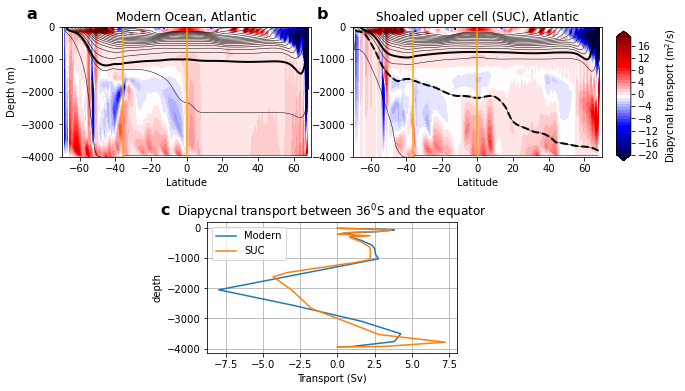

In [31]:
varpi = ((grid.diff(grid.cumsum(ds50.LaUH1RHO,'1RHO',boundary='fill')*ds50.dyG, 'X',boundary='fill') + 
             grid.diff(grid.cumsum(ds50.LaVH1RHO,'1RHO',boundary='fill')*ds50.dxG, 'Y',boundary='fill'))
          / grid.interp(ds50.dyG,'X',boundary='fill'))[0,:,:,141:].sum('XC')

varpiLGM = ((grid2.diff(grid2.cumsum(dsLGM50.LaUH1RHO,'1RHO',boundary='fill')*ds50.dyG, 'X',boundary='fill') + 
             grid2.diff(grid2.cumsum(dsLGM50.LaVH1RHO,'1RHO',boundary='fill')*ds50.dxG, 'Y',boundary='fill'))
             /grid.interp(ds50.dyG,'X',boundary='fill'))[0,:,:,141:].sum('XC')
layer_depth = grid.interp(layers_depth_atlmix1,'Y', boundary='fill')
layer_depthLGM = grid2.interp(layers_depth_atlmix2,'Y', boundary='fill')


varpi.coords['depth']=-layer_depth
varpiLGM.coords['depth']=-layer_depthLGM

fig = plt.figure(figsize=(10,6),constrained_layout=True)
gs = fig.add_gridspec(2, 4,left=0.05, right=0.8, wspace=0.4,hspace=0.5)
f_ax1 = fig.add_subplot(gs[0, 0:2])
(varpi[:,:-1].rolling(YC=2).mean()).plot.contourf(x='YC',y='depth',ax=f_ax1,vmin=-20,vmax=20,
                             xlim=(-70,70),ylim=(-4000,0),cmap='seismic',levels=np.arange(-1,1,0.05)*20
                                                 , add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0085,0.4,0.2),colors='black',linewidths=2)
plt.title('Modern Ocean, Atlantic')
plt.ylabel('Depth (m)')
plt.xlabel('Latitude')
f_ax1.axvline(-36,color='orange')
f_ax1.axvline(0,color='orange')
f_ax1.text(-0.1, 1.15, 'a', transform=f_ax1.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

f_ax2 = fig.add_subplot(gs[0, 2:])
im = (varpiLGM[:,:-1].rolling(YC=2).mean()).plot.contourf(x='YC',y='depth',ax=f_ax2,vmin=-20,vmax=20,
                             xlim=(-70,70),ylim=(-4000,0),cmap='seismic',levels=np.arange(-1,1,0.05)*20
                                                         , add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.014,0.4,0.2),colors='black',linewidths=2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.01,0.4,0.2),colors='black',
                            linestyles='dashed',linewidths=2)
plt.title('Shoaled upper cell (SUC), Atlantic')
plt.ylabel('')
plt.xlabel('Latitude')
f_ax2.axvline(-36,color='orange')
f_ax2.axvline(0,color='orange')

f_ax2.text(-0.1, 1.15, 'b', transform=f_ax2.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

f_ax3 = fig.add_subplot(gs[1:, 1:3])
vertical_transport = (varpi*grid.interp(ds50.dyG,'X',boundary='fill')[:,141:].mean('XC')).sel(YC=slice(-36,0)).sum('YC')
vertical_transport['depth'] = -layer_depth.sel(YC=slice(-36,0)).mean('YC')
vertical_transportLGM = (varpiLGM*grid2.interp(ds50.dyG,'X',boundary='fill')[:,141:].mean('XC')).sel(YC=slice(-36,0)).sum('YC')
vertical_transportLGM['depth'] = -layer_depthLGM.sel(YC=slice(-36,0)).mean('YC')

(vertical_transport/10**6).plot(y='depth',ax=f_ax3)
(vertical_transportLGM/10**6).plot(y='depth',ax=f_ax3)
plt.legend(['Modern',"SUC"])
plt.grid()
plt.title('Diapycnal transport between 36$^0$S and the equator')
plt.xlabel('Transport (Sv)')

f_ax3.text(-0.15, 1.15, 'c', transform=f_ax3.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.57, 0.02, 0.3])
fig.colorbar(im, cax=cbar_ax,label='Diapycnal transport (m$^2$/s)')
fig.savefig('Vertical_transport.pdf', bbox_inches='tight')

In [ ]:
#Plot figure S2
buoy=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))
baxis=(-9.81*(ds50.layer_1RHO_bounds-35)/1035).values[::-1]


tracer_500 = layers_apply(ds500.TRAC01.mean('time'), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_500 = layers_apply(xr.ones_like(ds500.TRAC01.mean('time')), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')



fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_500/zeta_500)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Modern ocean')
ax=plt.gca()
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
b = ROC_pac1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix1
c=(tracer_500/zeta_500)[:,:140,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,:140,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_pac1)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))#

buoy50=9.81*(2*10**-4*dsLGM50.THETA-7.4*10**-4*(dsLGM50.SALT-35))
baxis=np.insert(np.insert((-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035).values[::-1],0,0,axis=0),0,-0.01,axis=0)



tracer_500 = layers_apply(dsLGM500.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')
zeta_500 = layers_apply(xr.ones_like(dsLGM50.TRAC01.mean('time')), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')



plt.subplot(2, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_500/zeta_500)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)

(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Shoaled upper cell (SUC)')
ax=plt.gca()
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
b = ROC_pac2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix2
c=(tracer_500/zeta_500)[:,:140,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,:140,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

im=c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_pac2)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)

plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
fig.savefig('tracers_modern_LGM.pdf', bbox_inches='tight')

In [ ]:
#Eulerian tracers (figure3)
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
TRAC1_atl=(ds500.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
#p = plt.Rectangle((-30, -4000), 30, 2000, fill=False, ec='r',lw=2)
#ax.add_patch(p)
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.set_title(r'Modern ocean')
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_pac=(ds500.TRAC01)[0,:,:,0:140].mean('XC')
TRAC1_pac.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_pac/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_pac/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax = plt.gca()
ax.set_ylabel('depth')
ax.set_xlabel('Latitude')
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 2)
TRAC1_atlLGM=(dsLGM500.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atlLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC)')
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_pacLGM=(dsLGM500.TRAC01)[0,:,:,:140].mean('XC')
im=TRAC1_pacLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_pac_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_pac_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)

ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_xlabel('Latitude')
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
fig.savefig('tracers_500_depth.pdf', bbox_inches='tight')

In [ ]:
#Eulerian tracers (figure 7)
fig = plt.figure(figsize=(12,14))
plt.subplot(3, 2, 1)
TRAC1_atl=(ds50.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.set_title(r'Modern ocean Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')
ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3, 2, 3)
TRAC1_atl2=(ds5000.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl2.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax = plt.gca()
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 5)
(TRAC1_atl2-TRAC1_atl).plot(vmin=-1,vmax=1,rasterized=True,cmap='seismic',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('depth')
ax.set_title('')
ax.text(-0.1, 1.15, 'e', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 2)
TRAC1_atlLGM=(dsLGM50.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atlLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC), Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 4)
TRAC1_atl2LGM=(dsLGM5000.TRAC01)[0,:,:,140:].mean('XC')
im=TRAC1_atl2LGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 6)
im2=(TRAC1_atl2LGM-TRAC1_atlLGM).plot(vmin=-1,vmax=1,rasterized=True,cmap='seismic',add_colorbar=False)
(Eul_atl_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.text(-0.1, 1.15, 'f', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


fig.subplots_adjust(hspace=0.4, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.54, 0.02, 0.34])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.15])
fig.colorbar(im2, cax=cbar_ax,label='$\Delta$ NAW fraction')
fig.savefig('uniform_isopycnal_mixing.pdf', bbox_inches='tight')

In [ ]:
#Density tracers (figure S4)
buoy=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))
baxis=(-9.81*(ds50.layer_1RHO_bounds-35)/1035).values[::-1]

tracer_50 = layers_apply(ds50.TRAC01.mean('time'), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_50 = layers_apply(xr.ones_like(ds50.TRAC01.mean('time')), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')

tracer_5000 = layers_apply(ds5000.TRAC01.mean('time'), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_5000 = zeta_50

fig = plt.figure(figsize=(12,14))
plt.subplot(3, 2, 1)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_50[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.set_title(r'Modern ocean Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')
ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3, 2, 3)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_5000/zeta_5000)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 5)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_5000/zeta_5000-tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='seismic',levels=np.arange(-1,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('Latitude')
ax = plt.gca()
ax.text(-0.1, 1.15, 'e', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


buoy=9.81*(2*10**-4*dsLGM50.THETA-7.4*10**-4*(dsLGM50.SALT-35))
baxis=(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035).values[::-1]

tracer_50 = layers_apply(dsLGM50.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')
zeta_50 = layers_apply(xr.ones_like(dsLGM50.TRAC01.mean('time')), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')

tracer_5000 = layers_apply(dsLGM5000.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')
zeta_5000 = zeta_50

plt.subplot(3, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_50[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC), Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 4)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_5000/zeta_5000)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 6)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_5000/zeta_5000-tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

im2=c.plot.contourf(x='YC',y='depth',cmap='seismic',levels=np.arange(-1,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('Latitude')
ax = plt.gca()
ax.text(-0.1, 1.15, 'f', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


fig.subplots_adjust(hspace=0.4, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.54, 0.02, 0.34])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.15])
fig.colorbar(im2, cax=cbar_ax,label='$\Delta$ NAW fraction')
fig.savefig('uniform_isopycnal_dens.pdf', bbox_inches='tight')

In [ ]:
#plot map view for figure 1
nx=216
ny=144
nz=32
fname='tracers_mod_LGM/tracer_areas/tracerAAn.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerAPn.bin'
ds1=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerBA.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerBP.bin'
ds3=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerMAn.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerMPn.bin'
ds5=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerNA.bin'
ds7=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerNP.bin'
ds8=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerTA.bin'
ds9=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerTP.bin'
ds10=np.fromfile(fname,dtype='>f')
ds=ds1*0.01+ds5+ds3*0.46+ds9*0.38+ds7*0.33+ds10*0.28+ds8*0.23
ds[ds==0]=np.nan
land=np.reshape(ds,(nz,ny,nx))
land=np.transpose(land,(1,2,0))
indices=list(np.arange(140,215))+list(np.arange(0,140))+list(np.arange(140,160))
ax=plt.pcolor(np.linspace(0,210+0.97*19,235),np.linspace(-70,70,144),land[:,indices,1],cmap='tab20',rasterized=True)
#plt.colorbar(ax)
plt.plot((73,73), (-35, 70), 'k-')
plt.plot((211,211), (-52.5, 70), 'k-')
plt.plot((211,211), (-70, -65), 'k-')
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
errorboxes = []
rect = Rectangle((211,-70), 5, 3,hatch='xxxxxx',facecolor='None')
ax2 = plt.axes()
ax2.add_patch(rect)
rect = Rectangle((0,-70), 5, 3,hatch='xxxxxx',facecolor='None')
ax2 = plt.axes()
ax2.add_patch(rect)
plt.xlabel('longitude')
plt.ylabel('latitude')
land[10,10,1]
fig = plt.gcf()
fig.savefig('7boxes.pdf', bbox_inches='tight')

In [ ]:
kappav=np.asarray([0.0083, 0.0065, 0.0038,0.0014, 0.00039,0.000092,
           0.00003, 0.00002,0.00002,0.00002,0.00002,0.00002,
           0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,
           0.00002,0.00002,0.00002,0.00005,0.00013,0.00021,0.00022,0.00022,
           0.00022,0.00022,0.00022,0.00022])

In [ ]:
plt.plot(ds50.Z,kappav)

In [ ]:
plt.plot(ds50.Z,-np.diff(np.concatenate([np.asarray(0).reshape(1), kappav]))/ds50.drF.values)
plt.ylim(-0.000001,0.000001)

In [ ]:
ds50.drF